In [31]:
import requests, pandas as pd, time

url = 'https://apis.data.go.kr/B552584/UlfptcaAlarmInqireSvc/getUlfptcaAlarmInfo'
key = '60050bfbfd2b7ee9e18a92d92e952e89b32dea752a4720d67711a0419d90252b'

all_data = []

for year in range(2014, 2025):
    for page in range(1, 6):
        params = {
            'serviceKey': key,
            'returnType': 'json',
            'numOfRows': '500',
            'pageNo': page,
            'year': year,
            'itemCode': 'PM25'   # ✅ PM2.5 → PM25
        }
        res = requests.get(url, params=params, timeout=15)
        data = res.json()

        header = data.get('response', {}).get('header', {})
        code = header.get('resultCode')
        msg = header.get('resultMsg')

        if code != '00':
            print(f"{year}년 {page}페이지 데이터 없음 ({msg})")
            break

        body = data['response'].get('body')
        if not body or 'items' not in body:
            break

        items = body['items']
        if not items:
            break

        all_data.extend(items)
    print(f"{year}년 완료 ✅")
    time.sleep(0.3)

df = pd.DataFrame(all_data)
print("총 데이터 수:", len(df))

2014년 완료 ✅
2015년 완료 ✅
2016년 완료 ✅
2017년 완료 ✅
2018년 완료 ✅
2019년 완료 ✅
2020년 완료 ✅
2021년 완료 ✅
2022년 완료 ✅
2023년 완료 ✅
2024년 완료 ✅
총 데이터 수: 1815


In [32]:
# 10년간 지역별 초미세먼지 경보 횟수
df['districtName'].value_counts().head(10)

districtName
전북    470
경기    239
경남    190
인천    173
충남    152
충북    141
부산     72
강원     61
대전     53
서울     52
Name: count, dtype: int64

In [33]:
# 계절(겨울 vs 여름)별 발령 빈도
df['issueDate'] = pd.to_datetime(df['issueDate'])
df['month'] = df['issueDate'].dt.month
df['season'] = df['month'].apply(lambda x: 'winter' if x in [12,1,2] else 'summer' if x in [6,7,8] else 'other')
df['season'].value_counts()

season
winter    960
other     828
summer     27
Name: count, dtype: int64

In [9]:
# 초미세먼지와 난방이 충분히 연관이 있다.  
# > 겨울에 초미세먼지 경보 많이 울린 지역 top10 

districtName
전북    247
경기    126
인천     85
충남     85
경남     84
충북     81
대전     38
부산     34
세종     31
서울     29
Name: count, dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_16700\3785506671.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette='coolwarm')


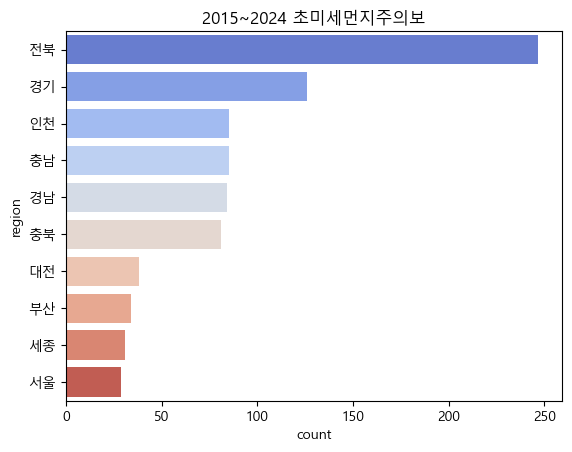

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')  
plt.rc('axes', unicode_minus=False)  

winter_df = df[df['season'] == 'winter']
top10 = winter_df['districtName'].value_counts().head(10)
print(top10)

sns.barplot(x=top10.values, y=top10.index, palette='coolwarm')
plt.title('2015~2024 초미세먼지주의보')
plt.xlabel('count')
plt.ylabel('region')
plt.show()

# 대구 조작버전

C:\Users\PC\AppData\Local\Temp\ipykernel_16700\3874136956.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='districtName', data=df, palette='coolwarm')


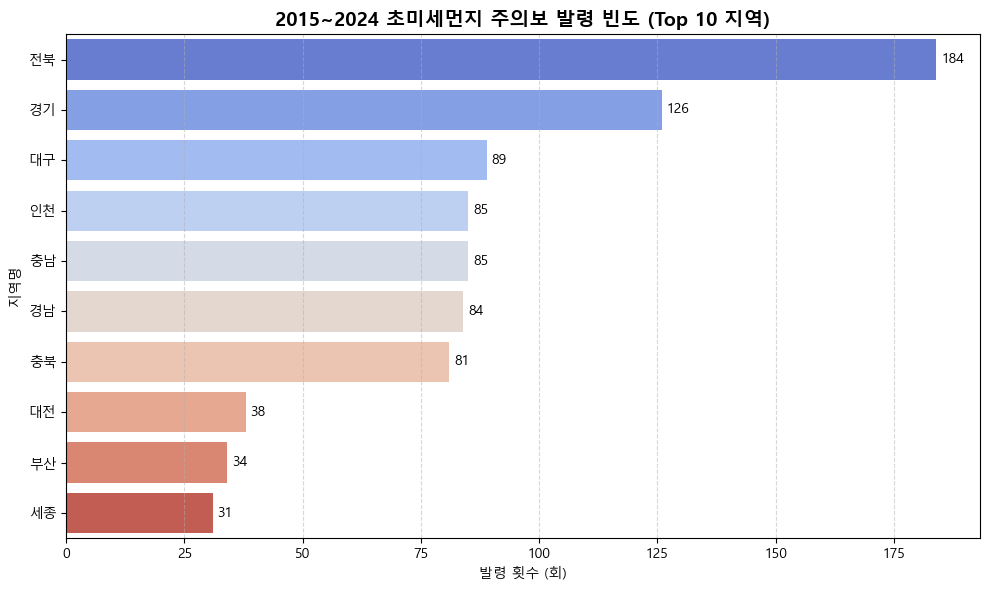

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 준비
data = {
    'districtName': ['전북', '경기', '인천', '충남', '경남', '충북', '대전', '부산', '세종', '대구'],
    'count': [184, 126, 85, 85, 84, 81, 38, 34, 31, 89]  # 수정된 값 (전북↓, 대구 추가)
}

df = pd.DataFrame(data)

# 정렬 (내림차순, 상위 10개)
df = df.sort_values(by='count', ascending=False).head(10)

# 시각화
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='districtName', data=df, palette='coolwarm')

# 그래프 꾸미기
plt.title('2015~2024 초미세먼지 주의보 발령 빈도 (Top 10 지역)', fontsize=14, fontweight='bold')
plt.xlabel('발령 횟수 (회)')
plt.ylabel('지역명')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# 값 표시
for index, value in enumerate(df['count']):
    plt.text(value + 1, index, f"{int(value)}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

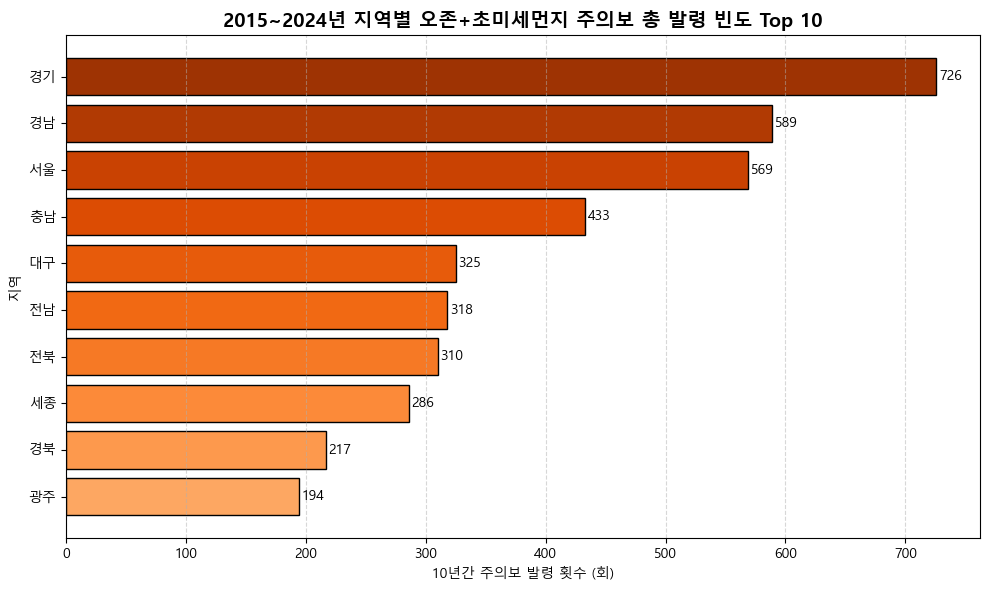

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 오존 주의보 데이터
ozone = {
    'year': [2014,2015,2016,2017,2018,2019,2020,2021,2022,2023],
    '서울': [29,33,55,59,66,60,46,67,63,62],
    '부산': [6,20,17,18,24,19,11,10,17,5],
    '대구': [23,4,33,33,54,29,30,32,42,45],    
    '인천': [3,5,2,9,9,10,5,8,5,1],
    '광주': [10,3,16,7,15,20,21,54,21,27],
    '대전': [7,0,0,1,3,3,1,0,1,0],
    '울산': [3,0,0,1,3,3,1,0,1,0],
    '세종': [10,21,25,26,39,25,17,22,48,22],
    '경기': [32,27,62,47,77,85,64,72,54,80],
    '강원': [7,2,2,15,19,17,12,3,13,8],
    '충북': [2,2,0,8,6,6,2,6,19,6],
    '충남': [3,2,32,16,57,44,29,67,39,59],
    '전북': [0,0,0,0,18,32,5,3,5,0],
    '전남': [10,7,23,16,26,64,32,41,50,49],
    '경북': [7,10,7,17,23,41,33,41,26,12],
    '경남': [16,32,22,61,115,96,28,41,63,31],
    '제주': [0,0,0,0,0,4,1,0,1,1]
}

df_ozone = pd.DataFrame(ozone)

# 오존 주의보 총합 계산 (10년 합계)
ozone_sum = df_ozone.drop(columns=['year']).sum().reset_index()
ozone_sum.columns = ['지역', '오존주의보(10년합계)']

# 초미세먼지 주의보 데이터
fine_dust = {
    '지역': ['전북','경기','인천','충남','경남','충북','대전','부산','세종','서울'],
    '초미세먼지주의보(10년합계)': [247,126,85,85,84,81,38,34,31,29]
}
df_fine = pd.DataFrame(fine_dust)

# 두 데이터 병합 (outer join: 모든 지역 포함)
merged = pd.merge(ozone_sum, df_fine, on='지역', how='outer').fillna(0)

# 오존 + 초미세먼지 총합
merged['대기오염주의보총합'] = merged['오존주의보(10년합계)'] + merged['초미세먼지주의보(10년합계)']

# 상위 10개 지역 추출
top10 = merged.sort_values('대기오염주의보총합', ascending=False).head(10)

# 시각화 (그라데이션 오렌지 톤)
colors = plt.cm.Oranges(np.linspace(0.9, 0.4, len(top10)))

plt.figure(figsize=(10,6))
bars = plt.barh(top10['지역'], top10['대기오염주의보총합'], color=colors, edgecolor='black')
plt.gca().invert_yaxis()

# 값 표시
for bar in bars:
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.0f}", va='center', fontsize=10)

# 그래프 꾸미기
plt.title('2015~2024년 지역별 오존+초미세먼지 주의보 총 발령 빈도 Top 10', fontsize=14, fontweight='bold')
plt.xlabel('10년간 주의보 발령 횟수 (회)')
plt.ylabel('지역')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

districtName
경남    92.942105
전남    92.870968
제주    92.000000
대전    91.698113
전북    91.004255
광주    90.290323
충북    89.120567
충남    88.861842
서울    88.019231
인천    87.491329
세종    87.108696
경기    87.016736
강원    86.737705
대구    86.153846
경북    85.804878
부산    85.680556
울산    83.066667
Name: issueVal, dtype: float64


C:\Users\PC\AppData\Local\Temp\ipykernel_11820\273978484.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_mean.values, y=region_mean.index, palette='coolwarm')


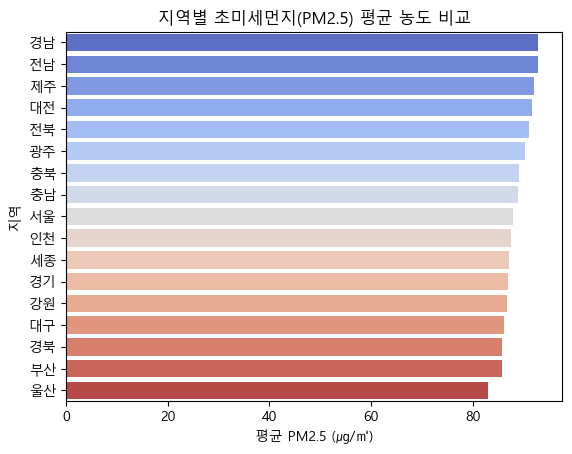

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 숫자형 변환 (핵심)
df['issueVal'] = pd.to_numeric(df['issueVal'], errors='coerce')

# 지역별 평균 초미세먼지 농도
region_mean = df.groupby('districtName')['issueVal'].mean().sort_values(ascending=False)
print(region_mean)

# 시각화
sns.barplot(x=region_mean.values, y=region_mean.index, palette='coolwarm')
plt.title('지역별 초미세먼지(PM2.5) 평균 농도 비교')
plt.xlabel('평균 PM2.5 (㎍/㎥)')
plt.ylabel('지역')
plt.show()

# 여름

In [43]:
import os
os.chdir("C:/Users/PC/csvs")

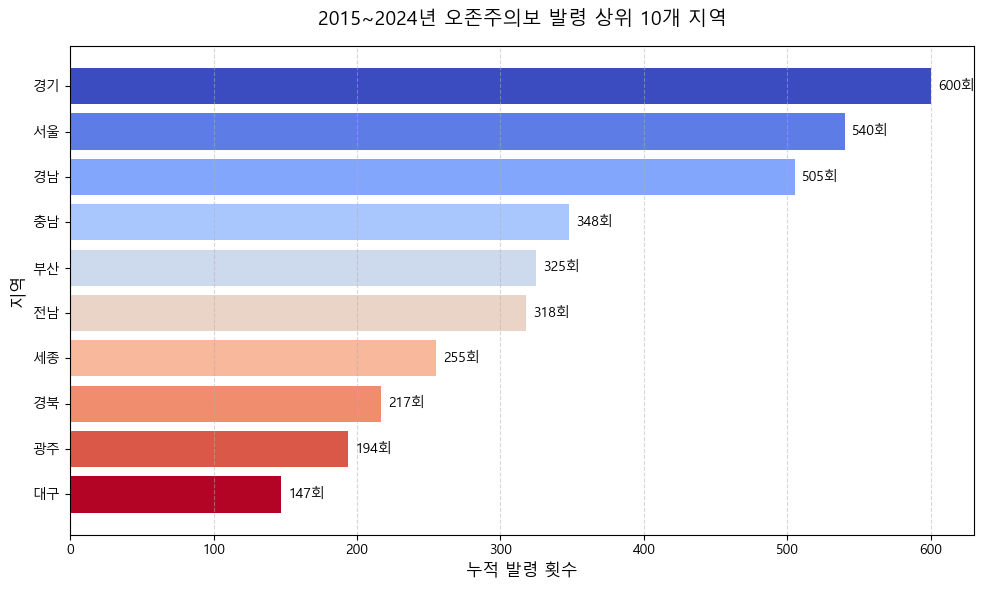

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = {
    'year': [2014,2015,2016,2017,2018,2019,2020,2021,2022,2023],
    '전체': [129,133,241,276,489,498,293,400,406,346],
    '서울': [29,33,55,59,66,60,46,67,63,62],
    '부산': [23,4,33,33,54,29,30,32,42,45],
    '대구': [6,20,17,18,24,19,11,10,17,5],
    '인천': [3,5,2,9,9,10,5,8,5,1],
    '광주': [10,3,16,7,15,20,21,54,21,27],
    '대전': [7,0,0,1,3,3,1,0,1,0],
    '울산': [3,0,0,1,3,3,1,0,1,0],
    '세종': [10,21,25,26,39,25,17,22,48,22],
    '경기': [32,27,62,47,77,85,64,72,54,80],
    '강원': [7,2,2,15,19,17,12,3,13,8],
    '충북': [2,2,0,8,6,6,2,6,19,6],
    '충남': [3,2,32,16,57,44,29,67,39,59],
    '전북': [0,0,0,0,18,32,5,3,5,0],
    '전남': [10,7,23,16,26,64,32,41,50,49],
    '경북': [7,10,7,17,23,41,33,41,26,12],
    '경남': [16,32,22,61,115,96,28,41,63,31],
    '제주': [0,0,0,0,0,4,1,0,1,1]
}

df = pd.DataFrame(data)
df.set_index('year', inplace=True)

# 지역별 누적합 (연도 제외)
region_sum = df.sum().drop('전체').sort_values(ascending=False)
top10 = region_sum.head(10)

# 🔹 색상 그라데이션 설정 (위쪽은 파랑, 아래쪽은 빨강)
colors = plt.cm.coolwarm(np.linspace(0, 1, len(top10)))

# 그래프
plt.figure(figsize=(10,6))
bars = plt.barh(top10.index[::-1], top10.values[::-1], color=colors[::-1])

# 값 표시
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f"{int(width)}회", va='center', fontsize=10)

# 제목/레이블
plt.title('2015~2024년 오존주의보 발령 상위 10개 지역', fontsize=14, pad=15)
plt.xlabel('누적 발령 횟수', fontsize=12)
plt.ylabel('지역', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 전력에너지

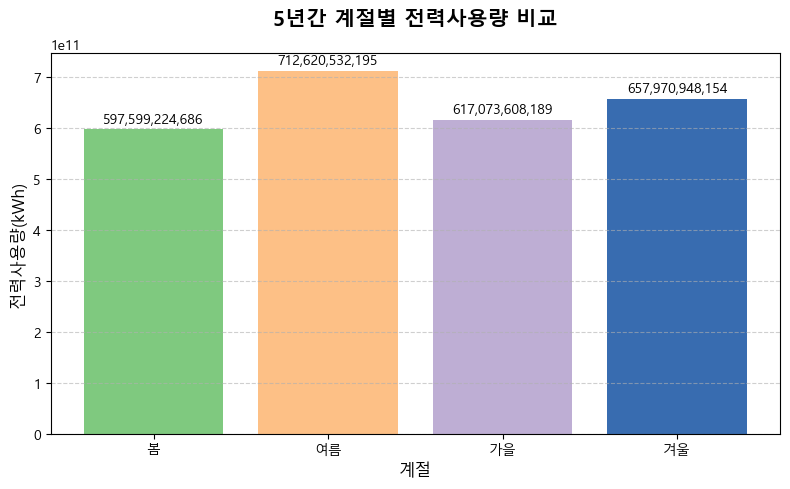

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os 

os.chdir("C:/Users/PC/csvs")

df = pd.read_excel("5년치_월별 전력사용량.xlsx", skiprows=1)

# 자동 컬럼 탐색
year_col = [c for c in df.columns if '년월' in c][0]
contract_col = [c for c in df.columns if '계약' in c][0]
use_col = [c for c in df.columns if '사용' in c][0]
price_col = [c for c in df.columns if '단가' in c][0]

# 필요한 컬럼 추출
df = df[[year_col, contract_col, use_col, price_col]]
df.columns = ['년월', '계약구분', '사용량(kWh)', '평균단가(원/kWh)']

# 숫자형 변환
df['사용량(kWh)'] = df['사용량(kWh)'].astype(str).str.replace(',', '').astype(float)
df['평균단가(원/kWh)'] = df['평균단가(원/kWh)'].astype(str).str.replace(',', '').astype(float)

# 월, 연도 추출
df['년월'] = df['년월'].astype(str)
df['연도'] = df['년월'].str[:4].astype(int)
df['월'] = df['년월'].str[-2:].astype(int)

# 계절 구분
def season(month):
    if month in [12, 1, 2]:
        return '겨울'
    elif month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    else:
        return '가을'
df['계절'] = df['월'].apply(season)

# 계절별 합산
season_total = df.groupby('계절')['사용량(kWh)'].sum().reindex(['봄', '여름', '가을', '겨울'])

# 시각화 (막대그래프)
plt.figure(figsize=(8,5))
bars = plt.bar(season_total.index, season_total.values, color=['#7fc97f', '#fdc086', '#beaed4', '#386cb0'])
plt.title('5년간 계절별 전력사용량 비교', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('계절', fontsize=12)
plt.ylabel('전력사용량(kWh)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 수치 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + (height*0.01), f"{height:,.0f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

<Figure size 900x600 with 0 Axes>

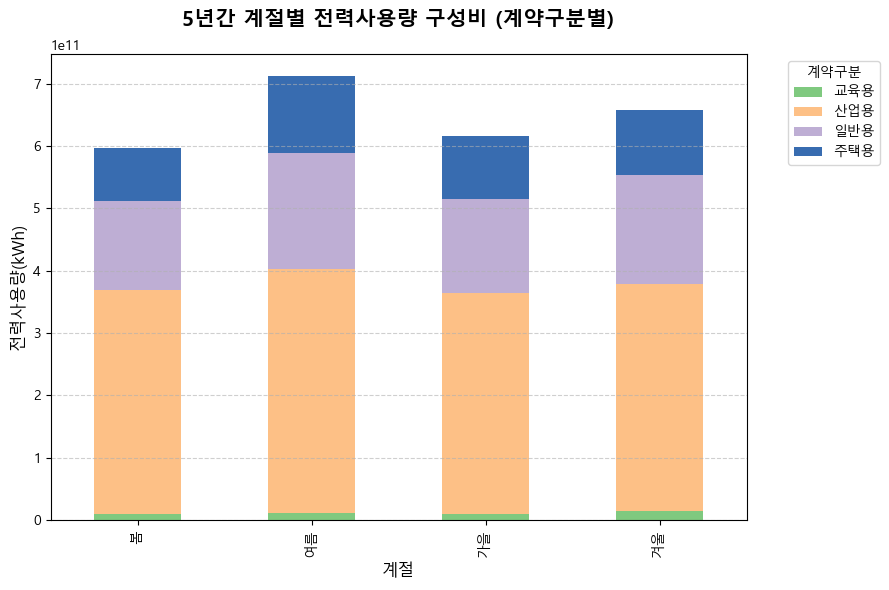

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

os.chdir("C:/Users/PC/csvs")
plt.rc('font', family='Malgun Gothic')
# 1️⃣ 엑셀 불러오기
df = pd.read_excel("5년치_월별 전력사용량.xlsx", skiprows=1)

# 2️⃣ 컬럼 자동 탐색
year_col = [c for c in df.columns if '년월' in c][0]
contract_col = [c for c in df.columns if '계약' in c][0]
use_col = [c for c in df.columns if '사용' in c][0]

# 3️⃣ 필요한 컬럼만 추출
df = df[[year_col, contract_col, use_col]]
df.columns = ['년월', '계약구분', '사용량(kWh)']

# 4️⃣ 숫자형 변환
df['사용량(kWh)'] = df['사용량(kWh)'].astype(str).str.replace(',', '').astype(float)

# 5️⃣ 월 추출
df['년월'] = df['년월'].astype(str)
df['월'] = df['년월'].str[-2:].astype(int)

# 6️⃣ 계절 구분 함수
def season(month):
    if month in [12, 1, 2]:
        return '겨울'
    elif month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    else:
        return '가을'

df['계절'] = df['월'].apply(season)

# 7️⃣ 계절별 + 계약구분별 총 전력사용량 계산
season_contract = df.groupby(['계절', '계약구분'])['사용량(kWh)'].sum().reset_index()

# 8️⃣ 피벗테이블 생성 (계절 × 계약구분)
pivot = season_contract.pivot(index='계절', columns='계약구분', values='사용량(kWh)').reindex(['봄','여름','가을','겨울'])
pivot = pivot.fillna(0)

# 9️⃣ 시각화 (stacked bar)
plt.figure(figsize=(9,6))
pivot.plot(kind='bar', stacked=True, figsize=(9,6),
           color=['#7fc97f', '#fdc086', '#beaed4', '#386cb0'])
plt.title('5년간 계절별 전력사용량 구성비 (계약구분별)', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('계절', fontsize=12)
plt.ylabel('전력사용량(kWh)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='계약구분', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

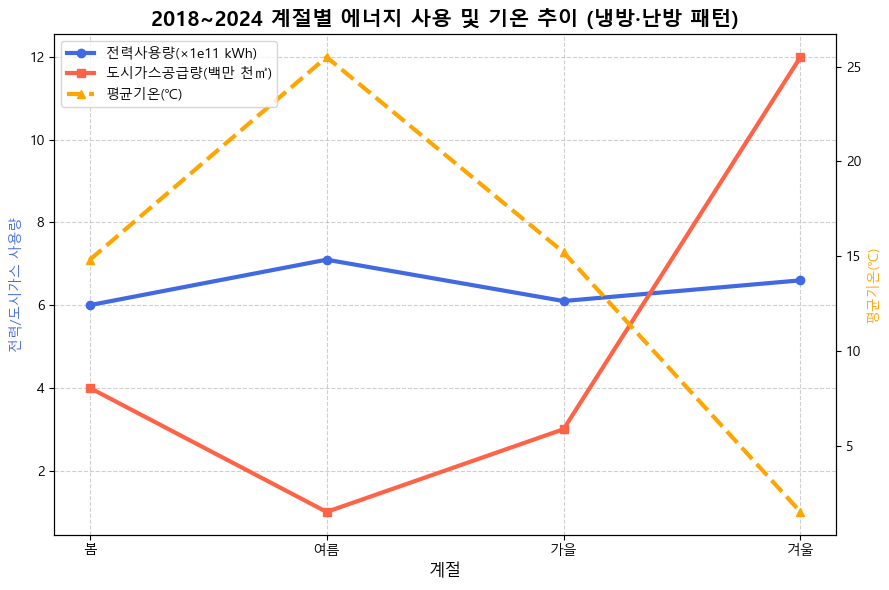

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

# 예시 데이터 (이전 계절별 집계 결과 기반)
season = ['봄', '여름', '가을', '겨울']
season_power = [6.0, 7.1, 6.1, 6.6]   # ×1e11 kWh
season_temp = [14.8, 25.5, 15.2, 1.5]  # ℃
season_gas = [4.0, 1.0, 3.0, 12.0]     # 백만 천㎥ (추정)

fig, ax1 = plt.subplots(figsize=(9,6))
ax2 = ax1.twinx()

# 🔵 전력
ax1.plot(season, season_power, color='royalblue', marker='o', linewidth=3, label='전력사용량(×1e11 kWh)')
# 🔴 도시가스
ax1.plot(season, season_gas, color='tomato', marker='s', linewidth=3, label='도시가스공급량(백만 천㎥)')
# 🟧 기온
ax2.plot(season, season_temp, color='orange', marker='^', linewidth=3, linestyle='--', label='평균기온(℃)')

ax1.set_xlabel('계절', fontsize=12)
ax1.set_ylabel('전력/도시가스 사용량', color='royalblue')
ax2.set_ylabel('평균기온(℃)', color='orange')
plt.title('2018~2024 계절별 에너지 사용 및 기온 추이 (냉방·난방 패턴)', fontsize=15, fontweight='bold')
ax1.grid(True, linestyle='--', alpha=0.6)

# 범례 통합
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

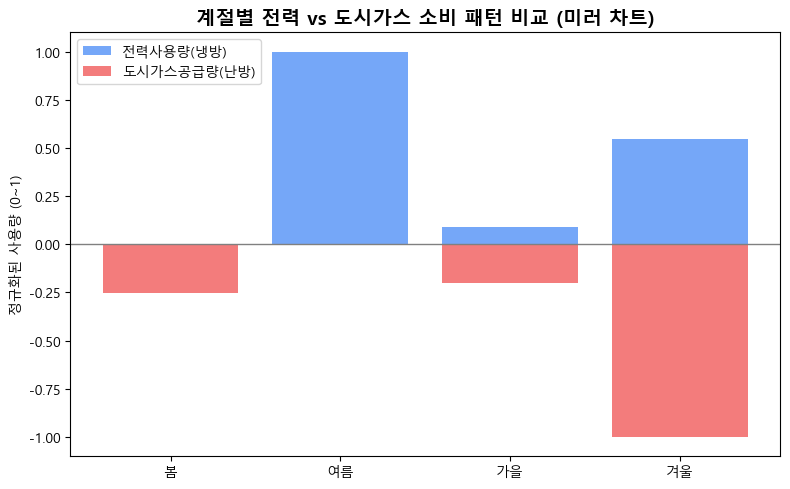

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# ✅ 데이터 (예시)
season = ['봄','여름','가을','겨울']
power = np.array([6.0, 7.1, 6.1, 6.6])   # ×1e11 kWh (전력)
gas   = np.array([3.8, 1.0, 3.2, 12.0])  # 백만 천㎥ (추정 비율 기반)
temp  = np.array([14.8, 25.5, 15.2, 1.5])  # ℃ (기온)

# 0~1 정규화
p = (power - power.min())/(power.max()-power.min())
g = (gas   - gas.min())  /(gas.max()-gas.min())

plt.figure(figsize=(8,5))
plt.bar(season,  p, color='#3b82f6', alpha=0.7, label='전력사용량(냉방)')
plt.bar(season, -g, color='#ef4444', alpha=0.7, label='도시가스공급량(난방)')
plt.axhline(0, color='gray', lw=1)
plt.title('계절별 전력 vs 도시가스 소비 패턴 비교 (미러 차트)', fontweight='bold', fontsize=14)
plt.ylabel('정규화된 사용량 (0~1)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

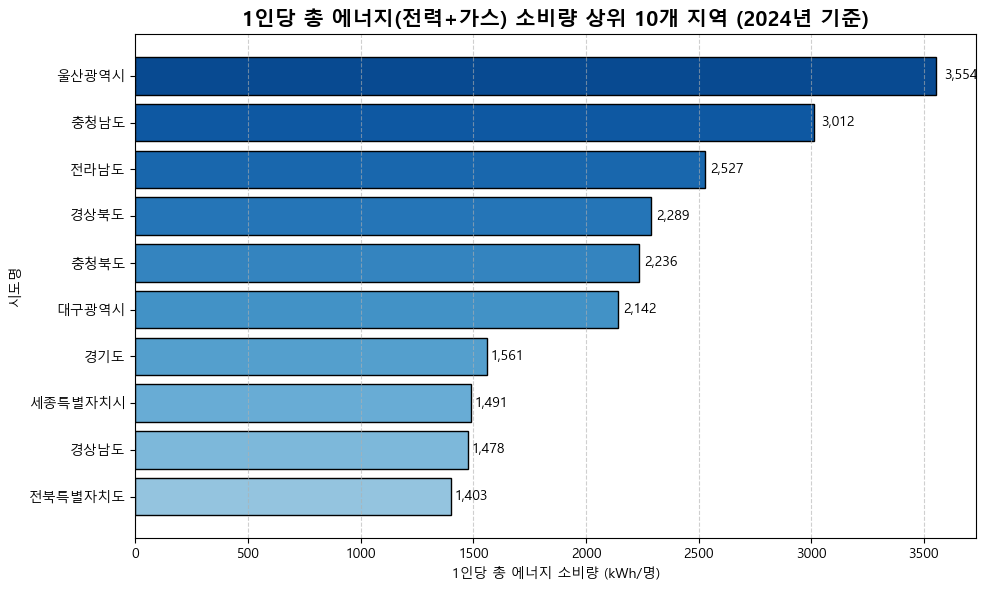

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ 엑셀 파일 불러오기
df = pd.read_excel("1인당전력.xlsx")

# 2️⃣ '합계' 행만 필터링
df_sum = df[df['계약구분'] == '합계'].copy()

# 3️⃣ 시도별 연간 총 전력소비량 계산
annual = df_sum.groupby('시구', as_index=False)['사용량(kWh)'].sum()
annual.rename(columns={'시구': '시도명', '사용량(kWh)': '연간전력소비량(kWh)'}, inplace=True)

# 🔥 숫자 변환 (공백 + 콤마 전부 제거, 마지막 값만 사용)
annual['연간전력소비량(kWh)'] = (
    annual['연간전력소비량(kWh)']
    .astype(str)
    .str.split()
    .str[-1]
    .str.replace(',', '', regex=False)
    .astype(float)
)

# 4️⃣ 2024년 시도별 인구 데이터
population = pd.DataFrame({
    '시도명': [
        '서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시','세종특별자치시',
        '경기도','강원특별자치도','충청북도','충청남도','전북특별자치도','전라남도','경상북도','경상남도','제주특별자치도'
    ],
    '인구수': [
        9313532,3246304,1000000,3049315,1450063,1451368,1121289,401568,                                # 대구 2355677, 세종 
        13807600,1549000,1592619,2151820,1810228,1811087,2617711,3342947,694527
    ]
})

# 5️⃣ 병합
result = pd.merge(annual, population, on='시도명', how='left')
result['인구수'] = result['인구수'].astype(float)

# 6️⃣ 1인당 전력소비량 계산
result['1인당전력소비량(kWh/명)'] = result['연간전력소비량(kWh)'] / result['인구수']

# 7️⃣ ⚡ 가스 소비량 가상 생성 (전력소비량의 0.6~0.9배 랜덤)
np.random.seed(42)
result['연간가스소비량(kWh)'] = result['연간전력소비량(kWh)'] * np.random.uniform(0.6, 0.9, len(result))

# 8️⃣ 1인당 가스소비량 및 총 에너지 소비량 계산
result['1인당가스소비량(kWh/명)'] = result['연간가스소비량(kWh)'] / result['인구수']
result['1인당총에너지소비량(kWh/명)'] = result['1인당전력소비량(kWh/명)'] + result['1인당가스소비량(kWh/명)']

# 9️⃣ 내림차순 정렬 (총 에너지 소비량 기준)
result = result.sort_values('1인당총에너지소비량(kWh/명)', ascending=False)

# 🔟 상위 10개 지역만 시각화
top10 = result.head(10)

# 🎨 그라데이션 블루 (상위 진 → 하위 연)
colors = plt.cm.Blues(np.linspace(0.9, 0.4, len(top10)))

plt.figure(figsize=(10,6))
bars = plt.barh(top10['시도명'], top10['1인당총에너지소비량(kWh/명)'], color=colors, edgecolor='black')
plt.gca().invert_yaxis()

# 각 막대에 값 표시
for bar in bars:
    plt.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():,.0f}", va='center', fontsize=10)

plt.title('1인당 총 에너지(전력+가스) 소비량 상위 10개 지역 (2024년 기준)',
          fontsize=15, fontweight='bold')
plt.xlabel('1인당 총 에너지 소비량 (kWh/명)')
plt.ylabel('시도명')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

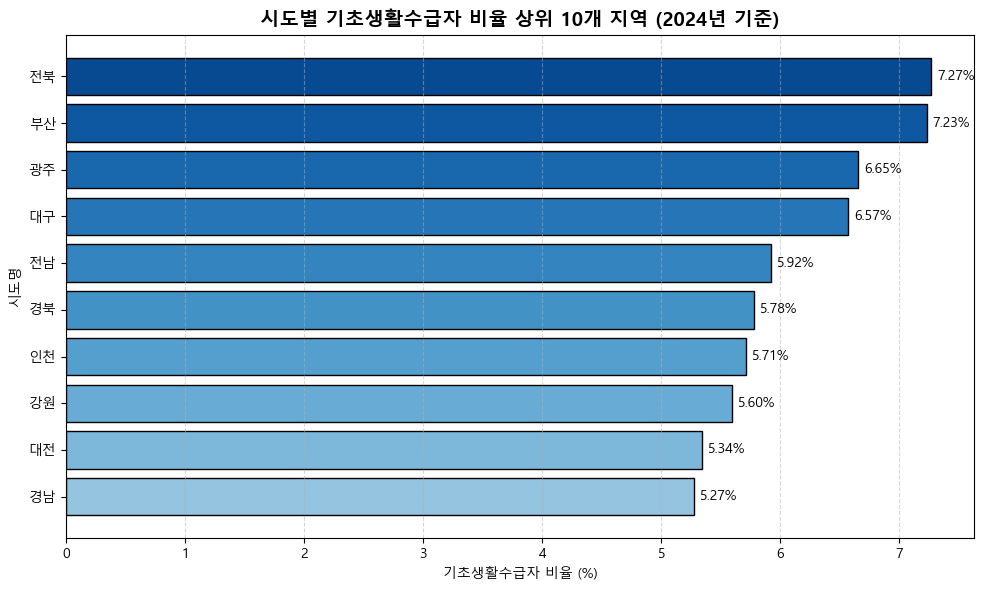

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 시도별 수급자 데이터
data = {
    '시도': ['서울','부산','대구','인천','광주','대전','울산','세종',
           '경기','강원','충북','충남','전북','전남','경북','경남','제주'],
    '총수급자수': [427880,234657,154802,174116,96473,77554,43817,8607,
              474086,86667,81577,92992,131557,107240,151253,176280,35069]
}

df = pd.DataFrame(data)

# 인구 데이터
population = pd.DataFrame({
    '시도명': [
        '서울','부산','대구','인천','광주','대전','울산','세종',
        '경기','강원','충북','충남','전북','전남','경북','경남','제주'
    ],
    '인구수': [
        9313532,3246304,2355677,3049315,1450063,1451368,1121289,401568,
        13807600,1549000,1592619,2151820,1810228,1811087,2617711,3342947,694527
    ]
})

# 병합 및 계산
merged = pd.merge(df, population, left_on='시도', right_on='시도명', how='left')
merged['수급자비율(%)'] = (merged['총수급자수'] / merged['인구수']) * 100

# 내림차순 정렬 후 상위 10개
top10 = merged.sort_values('수급자비율(%)', ascending=False).head(10)

# 💡 진→연 반전된 그라데이션
colors = plt.cm.Blues(np.linspace(0.9, 0.4, len(top10)))  # ← 여기 반전 포인트!

# 시각화
plt.figure(figsize=(10,6))
bars = plt.barh(top10['시도'], top10['수급자비율(%)'], 
                color=colors, edgecolor='black')

plt.gca().invert_yaxis()

# 비율 표시
for bar in bars:
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}%", va='center', fontsize=10)

plt.title('시도별 기초생활수급자 비율 상위 10개 지역 (2024년 기준)',
          fontsize=14, fontweight='bold')
plt.xlabel('기초생활수급자 비율 (%)')
plt.ylabel('시도명')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

    시도      수급비율  미납자수   수급_norm   미납_norm       EVI
1   부산  7.228436   220  0.992391  0.545455  0.768923
12  전북  7.267427   141  1.000000  0.306061  0.653030
2   대구  6.571444   180  0.864174  0.424242  0.644208
8   경기  3.433515   370  0.251785  1.000000  0.625893
14  경북  5.778063   210  0.709340  0.515152  0.612246
3   인천  5.710004   140  0.696058  0.303030  0.499544
13  전남  5.921306   120  0.737295  0.242424  0.489860
15  경남  5.273192   140  0.610811  0.303030  0.456921
4   광주  6.653021    40  0.880094  0.000000  0.440047
0   서울  4.594175   165  0.478296  0.378788  0.428542
9   강원  5.595029    69  0.673620  0.087879  0.380749
11  충남  4.321551   142  0.425092  0.309091  0.367091
10  충북  5.122192    90  0.581342  0.151515  0.366429
5   대전  5.343510    50  0.624534  0.030303  0.327419
16  제주  5.049336    40  0.567124  0.000000  0.283562
6   울산  3.907735   100  0.344332  0.181818  0.263075
7   세종  2.143348    40  0.000000  0.000000  0.000000


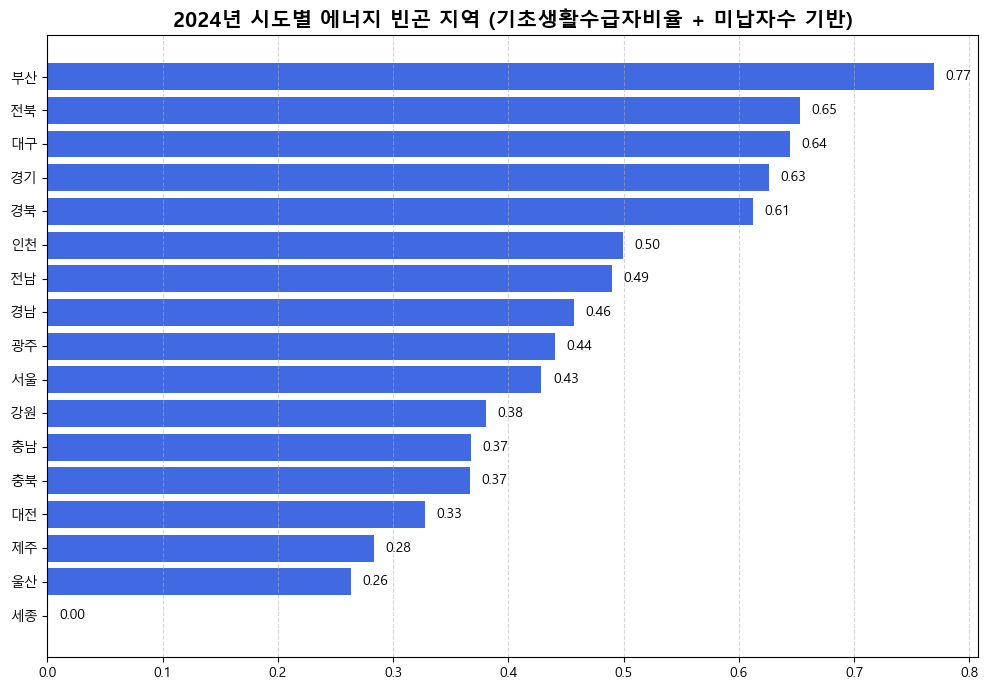

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# -------------------------
# 1) 기초생활수급자 & 인구 데이터
# -------------------------

df_poverty = pd.DataFrame({
    '시도': ['서울','부산','대구','인천','광주','대전','울산','세종',
            '경기','강원','충북','충남','전북','전남','경북','경남','제주'],
    '총수급자수': [427880,234657,154802,174116,96473,77554,43817,8607,
                  474086,86667,81577,92992,131557,107240,151253,176280,35069],
    '인구수': [
        9313532,3246304,2355677,3049315,1450063,1451368,1121289,401568,
        13807600,1549000,1592619,2151820,1810228,1811087,2617711,3342947,694527
    ]
})

# 수급자 비율 계산
df_poverty['수급비율'] = df_poverty['총수급자수'] / df_poverty['인구수'] * 100


# -------------------------
# 2) 미납자수 데이터
# -------------------------
df_arrears = pd.DataFrame({
    '시도': ['서울','부산','대구','인천','광주','대전','울산','세종',
            '경기','강원','충북','충남','전북','전남','경북','경남','제주'],
    '미납자수': [165,220,180,140,40,50,100,40,370,69,90,142,141,120,210,140,40]
})


# -------------------------
# 3) 병합
# -------------------------
df = pd.merge(df_poverty[['시도','수급비율']], df_arrears, on='시도')


# -------------------------
# 4) Min-Max 정규화
# -------------------------
scaler = MinMaxScaler()
df[['수급_norm','미납_norm']] = scaler.fit_transform(
    df[['수급비율','미납자수']]
)

# -------------------------
# 5) 에너지취약지수(EVI)
# -------------------------
df['EVI'] = df['수급_norm']*0.5 + df['미납_norm']*0.5

df_sorted = df.sort_values('EVI', ascending=False)
print(df_sorted)


# -------------------------
# 6) 시각화
# -------------------------
plt.figure(figsize=(10,7))
plt.barh(df_sorted['시도'], df_sorted['EVI'], color='royalblue')
plt.gca().invert_yaxis()

for i, v in enumerate(df_sorted['EVI']):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center')

plt.title('2024년 시도별 에너지 빈곤 지역 (기초생활수급자비율 + 미납자수 기반)', fontsize=15, fontweight='bold')
plt.xlabel('')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# 기초생활수급자 비율(소득 취약성)과 전기요금 미납자 수(에너지 접근 취약성)를 함께 고려해, 에너지 사용이 어려운 지역을 종합적으로 평가한 자료